In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt
import DiseaseAnalysis
from scipy.optimize import minimize_scalar

In [2]:
# Total pop, infection rate, recovery rate, death rate, crossInfectivity, StartInfected, quarantine leak rate, quarantine time
group1 = DiseaseAnalysis.Population(10000, 0.25, 0.05, 0.05, 0.01, False, 1, 1)

group2 = DiseaseAnalysis.Population(100000, 0.3, 0.01, 0.01, 0.01, True, 1, 1)

In [3]:
S = [group1.S + group2.S]
I = [group1.I + group2.I]
R = [group1.R + group2.R]
D = [group1.D + group2.D]

for i in range(100):
    group1.SIRD()
    group2.SIRD()
    
    DiseaseAnalysis.crossInfect(group1, group2)
    
    S.append(group1.S + group2.S)
    I.append(group1.I + group2.I)
    R.append(group1.R + group2.R)
    D.append(group1.D + group2.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

109999.99999999999


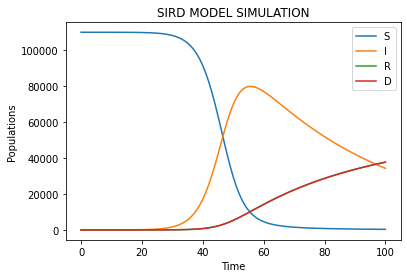

In [4]:
plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.plot(D, label="D")
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("SIRD MODEL SIMULATION")
plt.legend()
plt.show()

100.00000000000006


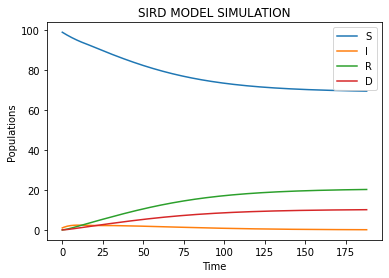

Total Deaths: 10.12721917039022


In [5]:
# Total pop, infection rate, recovery rate, death rate, crossInfectivity, StartInfected, quarantine leak rate, quarantine time
group3 = DiseaseAnalysis.Population(100, 0.50, 0.1, 0.05, 0.01, True, 0.25, 14)

S = [group3.S]
I = [group3.I]
R = [group3.R]
D = [group3.D]

while group3.I > 0.1:
    group3.SIRD()
    
    S.append(group3.S)
    I.append(group3.I)
    R.append(group3.R)
    D.append(group3.D)
    
print(S[-1] + I[-1] + R[-1] + D[-1])

plt.plot(S, label="S")
plt.plot(I, label="I")
plt.plot(R, label="R")
plt.plot(D, label="D")
plt.xlabel("Time")
plt.ylabel("Populations")
plt.title("SIRD MODEL SIMULATION")
plt.legend()
plt.show()

print("Total Deaths: {}".format(D[-1]))

Days of Quarantine: 1, Total Deaths: 32258.6973920443
Days of Quarantine: 2, Total Deaths: 31207.77360790637
Days of Quarantine: 3, Total Deaths: 29577.40120774613
Days of Quarantine: 4, Total Deaths: 27174.78563054418
Days of Quarantine: 5, Total Deaths: 23762.705444385538
Days of Quarantine: 6, Total Deaths: 19048.81242288756
Days of Quarantine: 7, Total Deaths: 12673.602348397631
Days of Quarantine: 8, Total Deaths: 4202.373290612994
Days of Quarantine: 9, Total Deaths: 11.657196287207594
Days of Quarantine: 10, Total Deaths: 4.898308541211198
Days of Quarantine: 11, Total Deaths: 3.361587408523203
Days of Quarantine: 12, Total Deaths: 2.68712487618761
Days of Quarantine: 13, Total Deaths: 2.3161080823124176
Days of Quarantine: 14, Total Deaths: 2.082805758143118
Days of Quarantine: 15, Total Deaths: 1.9207692538889931
Days of Quarantine: 16, Total Deaths: 1.8059148797071043
Days of Quarantine: 17, Total Deaths: 1.7246889949582354
Days of Quarantine: 18, Total Deaths: 1.659672973912

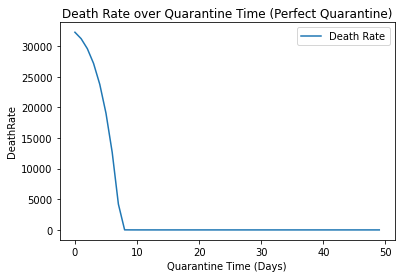

In [6]:
deathMeasurements = []

for i in range(50):
    group4 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, 0, i)
    
    while group4.I > 0.1:
        group4.SIRD()
        
    deathMeasurements.append(group4.D)
    print("Days of Quarantine: {}, Total Deaths: {}".format(i + 1, group4.D))
    
plt.plot(deathMeasurements, label="Death Rate")
plt.xlabel("Quarantine Time (Days)")
plt.ylabel("DeathRate")
plt.title("Death Rate over Quarantine Time (Perfect Quarantine)")
plt.legend()
plt.show()

Days of Quarantine: 1, Total Deaths: 32258.6973920443
Days of Quarantine: 2, Total Deaths: 31536.84673243427
Days of Quarantine: 3, Total Deaths: 30580.634540871382
Days of Quarantine: 4, Total Deaths: 29374.600756678934
Days of Quarantine: 5, Total Deaths: 27914.122499452882
Days of Quarantine: 6, Total Deaths: 26206.322437734147
Days of Quarantine: 7, Total Deaths: 24270.25048664364
Days of Quarantine: 8, Total Deaths: 22136.033909196787
Days of Quarantine: 9, Total Deaths: 19843.012421063322
Days of Quarantine: 10, Total Deaths: 17437.035918298054
Days of Quarantine: 11, Total Deaths: 14967.311038325548
Days of Quarantine: 12, Total Deaths: 12483.085409268353
Days of Quarantine: 13, Total Deaths: 10030.73731926675
Days of Quarantine: 14, Total Deaths: 7651.439841289641
Days of Quarantine: 15, Total Deaths: 5379.909771601481
Days of Quarantine: 16, Total Deaths: 3245.177921203635
Days of Quarantine: 17, Total Deaths: 1285.289780426465
Days of Quarantine: 18, Total Deaths: 102.3979082

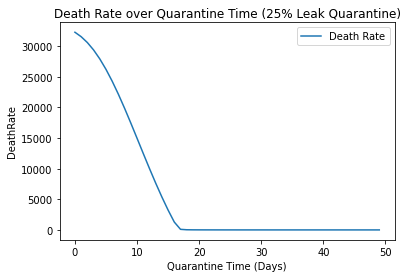

In [7]:
deathMeasurements = []

for i in range(50):
    group5 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, 0.25, i)
    
    while group5.I > 0.1:
        group5.SIRD()
        
    deathMeasurements.append(group5.D)
    print("Days of Quarantine: {}, Total Deaths: {}".format(i + 1, group5.D))
    
plt.plot(deathMeasurements, label="Death Rate")
plt.xlabel("Quarantine Time (Days)")
plt.ylabel("DeathRate")
plt.title("Death Rate over Quarantine Time (25% Leak Quarantine)")
plt.legend()
plt.show()

Optimal Quarantine Length: 8 days
Minimized (Deaths + Cost): 175657.20


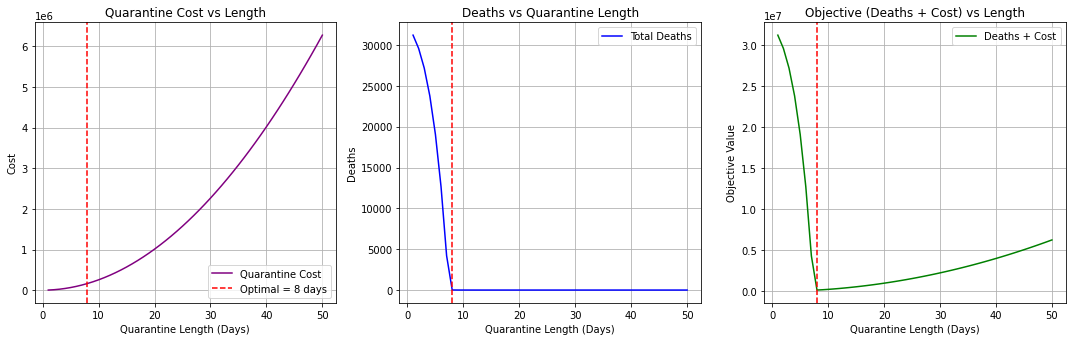

In [8]:
# ----------------------------
# Cost Function: Based only on quarantine length
# ----------------------------
def quarantine_cost_given_length(length, beta=500, gamma=2500):
    length = int(length)
    # Duration cost models linear costs like lost wages, missed appointments, and interrupted schooling
    duration_cost = beta * length
    
    # Duration penalty models costs that increase faster as the quarantine length increases, like economic
    # stagnation, mental health degredation, breakdown of public compliance, and civil and political unrest
    duration_penalty = gamma * (length ** 2)
    return duration_cost + duration_penalty

# ----------------------------
# Combined Objective: deaths + cost
# ----------------------------
def total_deaths_plus_cost(length, alpha=1_000, beta=500, gamma=2500):
    '''
    Alpha is the amount of costs saving 1 life is worth. 
    Beta represents the linear costs of quarantining. 
    Gamma represents the quadratic costs of quarantining.
    '''
    
    length = int(length)
    
    # Simulate
    pop = DiseaseAnalysis.Population(
        N=100000,
        beta=0.5,
        gamma=0.1,
        mu=0.05,
        crossInfectivity=0.01,
        infected=True,
        quarantineLeak=0.0,
        quarantineLength=length
    )
    
    while pop.I > 0.1:
        pop.SIRD()
    
    deaths = pop.D
    cost = quarantine_cost_given_length(length, beta=beta, gamma=gamma)

    # Weighted sum of deaths + cost
    return alpha * deaths + cost

# ----------------------------
# Optimization: minimize deaths + cost
# ----------------------------
result = minimize_scalar(
    total_deaths_plus_cost,
    bounds=(1, 50),
    method='bounded'
)

optimal_days = int(result.x)
min_total = result.fun
print(f"Optimal Quarantine Length: {optimal_days} days")
print(f"Minimized (Deaths + Cost): {min_total:.2f}")

# ----------------------------
# Evaluate across all lengths for plotting
# ----------------------------
lengths = list(range(1, 51))
total_costs = [quarantine_cost_given_length(l) for l in lengths]
deaths = []
total_objective = []

for l in lengths:
    pop = DiseaseAnalysis.Population(
        N=100000,
        beta=0.5,
        gamma=0.1,
        mu=0.05,
        crossInfectivity=0.01,
        infected=True,
        quarantineLeak=0.0,
        quarantineLength=l
    )
    while pop.I > 0.1:
        pop.SIRD()
    d = pop.D
    deaths.append(d)
    total_objective.append(total_deaths_plus_cost(l))

# ----------------------------
# Plotting
# ----------------------------
plt.figure(figsize=(15, 5))

# Total cost
plt.subplot(1, 3, 1)
plt.plot(lengths, total_costs, label="Quarantine Cost", color='purple')
plt.axvline(optimal_days, color='red', linestyle='--', label=f"Optimal = {optimal_days} days")
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Cost")
plt.title("Quarantine Cost vs Length")
plt.grid(True)
plt.legend()

# Total deaths
plt.subplot(1, 3, 2)
plt.plot(lengths, deaths, label="Total Deaths", color='blue')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Deaths")
plt.title("Deaths vs Quarantine Length")
plt.grid(True)
plt.legend()

# Total objective (Deaths + Cost)
plt.subplot(1, 3, 3)
plt.plot(lengths, total_objective, label="Deaths + Cost", color='green')
plt.axvline(optimal_days, color='red', linestyle='--')
plt.xlabel("Quarantine Length (Days)")
plt.ylabel("Objective Value")
plt.title("Objective (Deaths + Cost) vs Length")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

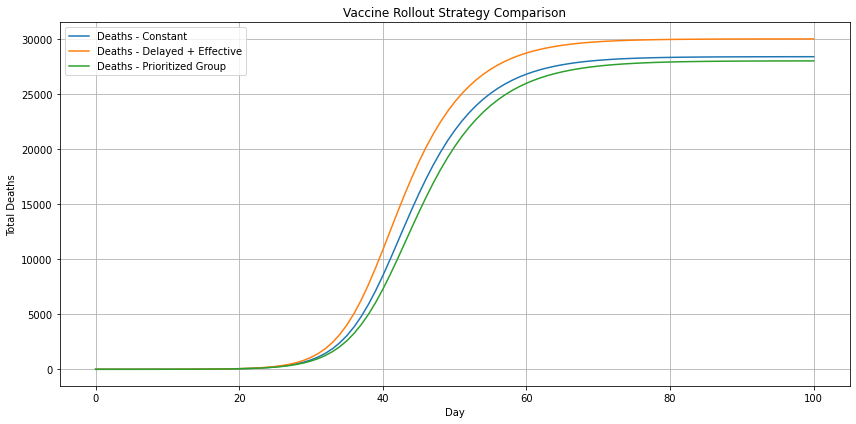

In [9]:
def simulate_with_vaccine(pop, days=100, rollout_plan=None):
    """
    Simulates disease spread with a custom vaccine rollout plan.
    rollout_plan: function(day, pop) → (num_vaccines, efficacy)
    """
    S, I, R, D = [pop.S], [pop.I], [pop.R], [pop.D]
    
    for day in range(days):
        if rollout_plan:
            num_vax, eff = rollout_plan(day, pop)
            pop.apply_vaccination(num_vax, eff)
        pop.SIRD()
        S.append(pop.S)
        I.append(pop.I)
        R.append(pop.R)
        D.append(pop.D)
    
    return S, I, R, D

def constant_rollout(day, pop):
    return (200, 0.95)  # 200 people per day, 95% effective

def delayed_high_efficacy(day, pop):
    if day < 20:
        return (0, 0)  # wait for better vaccines
    return (200, 0.98)

def priority_group_first(day, pop):
    group_size = 0.1 * pop.N
    vaccinated_so_far = pop.R + pop.D  # Approximate
    if vaccinated_so_far < group_size:
        return (300, 0.9)  # faster early rollout
    return (100, 0.95)  # normal pace after

# Create population
pop1 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)
pop2 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)
pop3 = DiseaseAnalysis.Population(100000, 0.5, 0.1, 0.05, 0.01, True, quarantineLeak=0.0, quarantineLength=0)

# Simulate
S1, I1, R1, D1 = simulate_with_vaccine(pop1, rollout_plan=constant_rollout)
S2, I2, R2, D2 = simulate_with_vaccine(pop2, rollout_plan=delayed_high_efficacy)
S3, I3, R3, D3 = simulate_with_vaccine(pop3, rollout_plan=priority_group_first)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(D1, label="Deaths - Constant")
plt.plot(D2, label="Deaths - Delayed + Effective")
plt.plot(D3, label="Deaths - Prioritized Group")
plt.title("Vaccine Rollout Strategy Comparison")
plt.xlabel("Day")
plt.ylabel("Total Deaths")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()